# Chapter 1

- Generate the observed data and intrinsic function

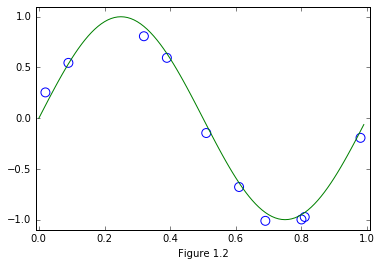

In [138]:
import numpy as np
import matplotlib.pyplot as plt

def twoLists2Pair(xL, yL):
    n = len(xL)
    m = len(yL)
    assert(n == m)
    return [(xL[i], yL[i]) for i in range(0, n)]

# ------------------------------------------------------------------
# Sample parameters setting
fs = 100 # sample rate 
xLeft = 0.0
xRight = 1.0

# Random parameters setting
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, fs)

# Intrinsic curve
x = np.arange(xLeft, xRight, (xRight - xLeft)/fs)
y = np.sin(2 * np.pi * x)

# Use Gaussian noise to generate observed data
t = y + s
rIndex = np.random.choice(range(0, fs), size=10, replace = False)
xDots = [x[i] for i in rIndex]
tDots = [t[i] for i in rIndex]
observedData = twoLists2Pair(xDots, tDots)

% matplotlib inline
f, ax = plt.subplots()

# Plot intrinsic curve
ax.plot(x, y, 'g')

# Plot the observed data
ax.scatter(xDots, tDots, s = 80, facecolors = 'none', edgecolors = 'b')

# Setting the plot range box
plt.axis([-0.01, 1.01, -1.1, 1.1])
ax.set_xlabel('Figure 1.2')
plt.show()


- Polynomial Curve Fitting, define the linear function and error function

In [139]:
# 'x' is univariable, and 'omega' is python list
def linearFunction(_x, _omega):
    M = len(_omega)
    x = np.array([_x**i for i in range(0, M)])
    omega = np.array(_omega)
    return x.dot(omega)

# Error function
def E_Function(_omega, _targetData):
    return 0.5 * sum(
        np.square(linearFunction(xE, _omega) - tE) 
            for (xE, tE) in _targetData)

- Prepare data for Figure 1.3

In [154]:
omega = [-0.125, 0.75, -1.5, 1]
x_model = x #np.arange(-1, 1, 0.01)
y_model = [linearFunction(_x, omega) for _x in x_model]

rIndex = np.random.choice(range(0, fs), size=3, replace = False)
x_model_sample = [x_model[i] for i in rIndex]
y_model_sample = [linearFunction(xData, omega) for xData in x_model_sample]
model_points = twoLists2Pair(x_model_sample, y_model_sample)

x_target = [x[i] for i in rIndex]
y_target = [t[i] for i in rIndex]
target_points = twoLists2Pair(x_target, y_target)

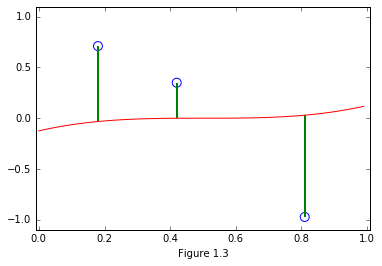

In [155]:
from matplotlib import collections  as mc

lines = []
for i in range(0, len(target_points)):
    lines = lines + [[target_points[i], model_points[i]]]

lc = mc.LineCollection(lines, linewidths = 2, color = 'g')

f, ax = plt.subplots()
ax.plot(x_model, y_model, 'r')
ax.add_collection(lc)
ax.scatter(x_target, y_target, s = 80, facecolors = 'none', edgecolors = 'b')
plt.axis([-0.01, 1.01, -1.1, 1.1])
ax.set_xlabel('Figure 1.3')
plt.show()